# Comprensión de los Datos
Emiliano Hervert de la Cruz | A01412606 | Carrera: IDM

In [1]:
#importa librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descripción de Variables

A continuación se presentan todas las variables que tiene el dataset, así como el significado de cada una:  
- **Pregnancies** - Número de veces embarazada  
- **Glucose** - Concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia a la glucosa oral  
- **BloodPressure** - Presión arterial diastólica (mm Hg)  
- **SkinThickness** - Espesor del pliegue cutáneo del tríceps (mm)  
- **Insulin** - Insulina sérica de 2 horas (mu U/ml)  
- **BMI** - Índice de masa corporal (peso en kg/(altura en m)^2)  
- **DiabetesPedigreeFunction** - Función de pedigrí de diabetes  
- **Age** - Edad (años)  
- **Outcome** - Resultado (tiene diabetes o no)

De igual manera, es importante mencionar que todos los datos provienen de pacientes mujeres de al menos 21 años de edad y de ascendencia indígena Pima.

In [2]:
#Leer archivo csv con los datos
df = pd.read_csv("diabetes.csv")

In [3]:
#Verificar cuántas filas y columnas se tienen, respectivamente
df.shape

(768, 9)

El dataset tienen 768 filas (incluyendo encabezados) y 9 columnas.

In [4]:
#Primeros 5 renglones del dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Últimos 5 renglones del dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
#Revisa la información mas completa del conjunto de datos usando la función info()
#Muestra el total de datos, las columnas y su tipo correspondiente, dice si contiene nulos o no
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Como se puede ver, ninguno de los atributos tiene valores nulos, ya que 768 de las 768 filas son non-null. Asimismo, todas las columnas usan números, específicamente datos de tipo entero a excepción del *BMI* y *DiabetesPedigreeFunction* que usan flotantes.

In [7]:
#Revisar cuántos valores únicos tiene cada atributo del archivo
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## Variables Seleccionadas
1. BMI
2. DiabetesPedigreeFunction
3. Outcome

In [8]:
#Nuevo dataframe solamente con mis variables seleccionadas
df_misvars = df[['BMI','DiabetesPedigreeFunction','Outcome']]

In [9]:
df_misvars.head()

,BMI,DiabetesPedigreeFunction,Outcome
0,33.6,0.627,1
1,26.6,0.351,0
2,23.3,0.672,1
3,28.1,0.167,0
4,43.1,2.288,1


# Exploración de Datos

In [10]:
#Estadísticas básicas de los atributos como cantidad de datos totales, su media, desviación estándar, mínimo, máximo y sus cuartiles
df_misvars.describe()

,BMI,DiabetesPedigreeFunction,Outcome
count,768.000000,768.000000,768.000000
mean,31.992578,0.471876,0.348958
std,7.884160,0.331329,0.476951
min,0.000000,0.078000,0.000000
25%,27.300000,0.243750,0.000000
50%,32.000000,0.372500,0.000000
75%,36.600000,0.626250,1.000000
max,67.100000,2.420000,1.000000


In [11]:
#Revisar valores nulos con funcion isnull().sum()
df_misvars.isnull().sum()

BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

De nuevo, confirmamos que la suma total de los valores nulos para cada uno de estos atributos es 0.

In [12]:
#Revisar valores únicos por columna usando función unique(): nombre-columna.unique()
df_misvars.Outcome.unique()

array([1, 0])

Los valores únicos para BMI y para DiabetesPedigreeFunction son muchos, ya que dependen de cada persona y no es común que coincidan. Sin embargo, aquí podemos ver que los valores únicos de Outcome son solo 0 y 1, es decir, si la paciente tiene o no Diabetes.

## Variables Cuantitativas

### Medidas de tendencia central


In [13]:
#DiabetesPedigreeFunction
#Se obtiene la media, mediana y moda
mean_pedigree = df_misvars['DiabetesPedigreeFunction'].mean()
median_pedigree = df_misvars['DiabetesPedigreeFunction'].median()
mode_pedigree = df_misvars['DiabetesPedigreeFunction'].mode()
print("Mean_pedigree:",mean_pedigree)
print("Median_pedigree:",median_pedigree)
print("Mode_pedigree:",mode_pedigree)

Mean_pedigree: 0.47187630208333325
Median_pedigree: 0.3725
Mode_pedigree: 0    0.254
1    0.258
Name: DiabetesPedigreeFunction, dtype: float64


In [14]:
#BMI
#Se obtiene la media, mediana y moda
mean_bmi = df_misvars['BMI'].mean()
median_bmi = df_misvars['BMI'].median()
mode_bmi = df_misvars['BMI'].mode()
print("Mean_bmi:",mean_bmi)
print("Median_bmi:",median_bmi)
print("Mode_bmi:",mode_bmi)

Mean_bmi: 31.992578124999998
Median_bmi: 32.0
Mode_bmi: 0    32.0
Name: BMI, dtype: float64



**Conclusiones**:  

Función de pedigrí de diabetes:
1. El promedio fue 0.47188
2. El valor al centro es 0.3725
3. Los valores más repetidos fueron 0.254 y 0.258

Índice de masa corporal:
1. El BMI promedio fue 31.99258 (el promedio está dentro de la categoría de obesidad leve)
2. El BMI al centro es 32 (al menos la mitad de las personas está en la categoría de obesidad leve o más arriba)
3. El BMI más repetido fue 32

## Variables Categóricas

In [15]:
#Para conteo  de cada valor en una columna, en orden descendente usar función value_counts():
df_misvars['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

De todos los datos, se obtiene que 500 personas no tienen diabetes, mientras que 268 sí tienen.

In [37]:
# Crear columna con variable Obesidad que clasifique como True a las personas que tienen obesidad (BMI >= 30).
# Debido a una advertencia que dice "A value is trying to be set on a copy of a slice from a DataFrame", se agregó .loc[row_indexer,col_indexer] = value

df_misvars.loc[:,'Obesidad'] = df_misvars['BMI'] >= 30

In [38]:
df_misvars

,BMI,DiabetesPedigreeFunction,Outcome,Obesidad
0,33.6,0.627,1,True
1,26.6,0.351,0,False
2,23.3,0.672,1,False
3,28.1,0.167,0,False
4,43.1,2.288,1,True
...,...,...,...,...
763,32.9,0.171,0,True
764,36.8,0.340,0,True
765,26.2,0.245,0,False
766,30.1,0.349,1,True


Se agregó una nueva columna para poder categorizar fácilmente a las personas que tienen obesidad y a las que no.

# Consulta

In [18]:
# Acceder a la primera fila
df_misvars.iloc[0]

BMI                          33.6
DiabetesPedigreeFunction    0.627
Outcome                         1
Obesidad                     True
Name: 0, dtype: object

In [19]:
# Acceder a las dos primeras filas
df_misvars.iloc[:2]

,BMI,DiabetesPedigreeFunction,Outcome,Obesidad
0,33.6,0.627,1,True
1,26.6,0.351,0,False


In [20]:
#Seleccionar columnas, indicando entre corchetes [nombreColumna, nombreColumna]
df_misvars[['BMI','DiabetesPedigreeFunction']]

,BMI,DiabetesPedigreeFunction
0,33.6,0.627
1,26.6,0.351
2,23.3,0.672
3,28.1,0.167
4,43.1,2.288
...,...,...
763,32.9,0.171
764,36.8,0.340
765,26.2,0.245
766,30.1,0.349


In [21]:
#Selección de filas [indicar dataframe[columna] operador valor]
personas_sin_infrapeso = df_misvars[df_misvars['BMI'] >= 18.5]

In [22]:
personas_sin_infrapeso

,BMI,DiabetesPedigreeFunction,Outcome,Obesidad
0,33.6,0.627,1,True
1,26.6,0.351,0,False
2,23.3,0.672,1,False
3,28.1,0.167,0,False
4,43.1,2.288,1,True
...,...,...,...,...
763,32.9,0.171,0,True
764,36.8,0.340,0,True
765,26.2,0.245,0,False
766,30.1,0.349,1,True


Aquí se hace una selección de solamente aquellas filas que NO contienen a pacientes con infrapeso (BMI < 18.5)

In [23]:
#ordenar usando funcion sort_values(by=atributo, ascending=True/false)
personas_sin_infrapeso.sort_values(by='DiabetesPedigreeFunction', ascending=True)

,BMI,DiabetesPedigreeFunction,Outcome,Obesidad
268,25.1,0.078,0,False
180,23.2,0.084,0,False
149,27.3,0.085,0,False
567,32.0,0.085,0,True
135,33.8,0.088,0,True
...,...,...,...,...
45,42.0,1.893,1,True
370,38.4,2.137,1,True
4,43.1,2.288,1,True
228,36.7,2.329,0,True


La selección de personas sin infrapeso es ordenada en base al valor de la función de pedigrí de diabetes de cada paciente, de manera ascendente.

In [24]:
#Agrupar por un atributo y calcular función de agregación utilizando groupby(atributo)['atributoAgregacion].funcion() (ej. mean() para promedio)
personas_sin_infrapeso.groupby('Obesidad')['DiabetesPedigreeFunction'].mean()

Obesidad
False    0.429267
True     0.498642
Name: DiabetesPedigreeFunction, dtype: float64

De esta selección de personas, se agrupan aquellos datos de pacientes con Obesidad y de aquellos sin Obesidad para obtener el promedio de la función de pedigrí de cada grupo.
***

Posteriormente, se consigue un subconjunto de las personas con su **valor de la función de pedigrí de diabetes** por **arriba del promedio**:

In [25]:
personas_con_pedigree_arribadelpromedio = df_misvars[df_misvars['DiabetesPedigreeFunction'] > df_misvars['DiabetesPedigreeFunction'].mean()]

In [26]:
personas_con_pedigree_arribadelpromedio

,BMI,DiabetesPedigreeFunction,Outcome,Obesidad
0,33.6,0.627,1,True
2,23.3,0.672,1,False
4,43.1,2.288,1,True
11,38.0,0.537,1,True
12,27.1,1.441,0,False
...,...,...,...,...
745,30.0,0.488,0,True
747,46.3,1.096,0,True
750,31.2,1.182,1,True
755,36.5,1.057,1,True


# Visualización y Análisis de Datos

## Variables Categóricas

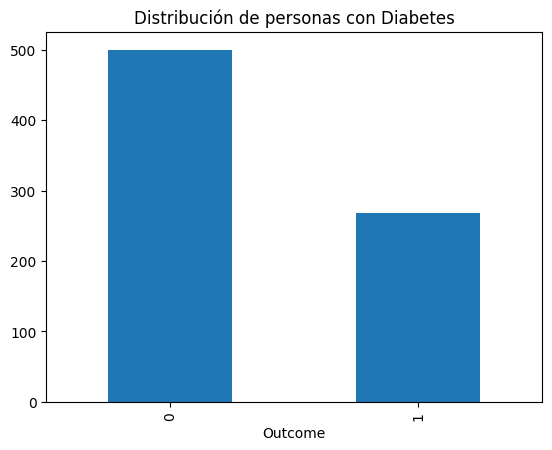

In [27]:
#Personas con diabetes y sin diabetes
diabetes = df_misvars['Outcome'].value_counts()
diabetes.plot(kind = 'bar')
plt.title('Distribución de personas con Diabetes')
plt.show()

Se observa que en el dataset, la mayoría de las personas no tienen diabetes. Se puede ver que las personas sin diabetes es casi el doble de las que sí.

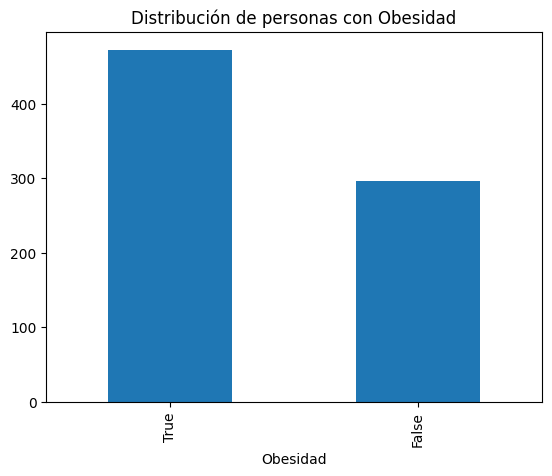

In [28]:
#Personas con obesidad y sin obesidad
obesidad = df_misvars['Obesidad'].value_counts()
obesidad.plot(kind = 'bar')
plt.title('Distribución de personas con Obesidad')
plt.show()

La mayoría de las personas tienen un BMI alto que las clasifica con Obesidad.

## Variables Cuantitativas

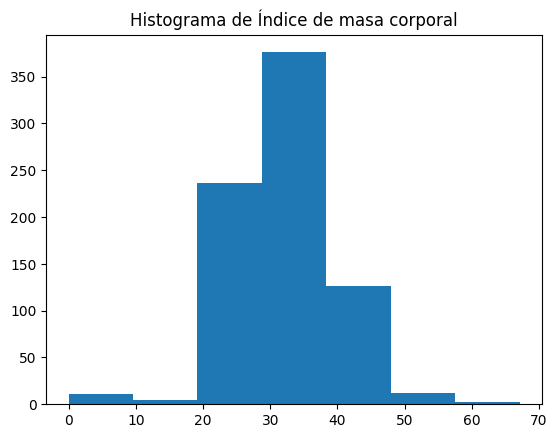

In [29]:
#Histograma de BMI (7 bins)
plt.hist(df_misvars['BMI'], bins=7)
plt.title('Histograma de Índice de masa corporal')
plt.show()

Aquí se observa la distribución del índice de masa corporal que tienen todas las pacientes. A simple vista, podemos ver que la mayoría está en un rango de entre 29 y 38 aproximadamente, así como muy pocas personas tienen menos de 19 o más de 48.

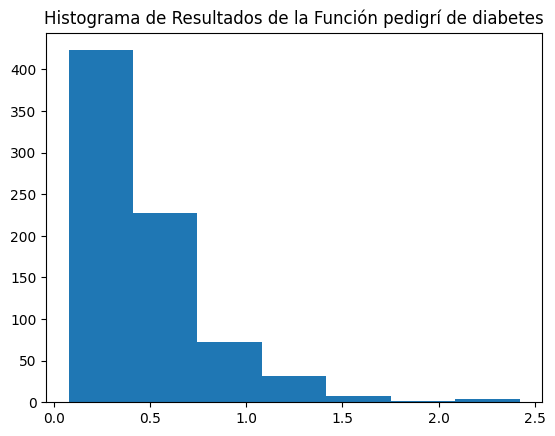

In [30]:
#Histograma de DiabetesPedigreeFunction (7 bins)
plt.hist(df_misvars['DiabetesPedigreeFunction'], bins=7)
plt.title('Histograma de Resultados de la Función pedigrí de diabetes')
plt.show()

Aquí se observa la distribución de los resultados obtenidos para cada paciente según la función pedigrí de diabetes. A simple vista, podemos ver que la mayoría tiene valores pequeños que comienzan desde 0.078 (el valor mínimo calculado anteriormente) y que hay pocas personas con valores altos, esto debido a que la cantidad de pacientes va disminuyendo a medida que comparamos con resultados más altos de la función.

Text(0.5, 1.0, 'Boxplot de BMI')

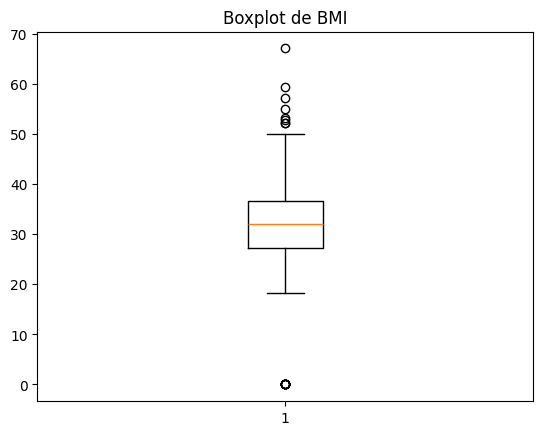

In [31]:
#Boxplot de BMI
plt.boxplot(df_misvars['BMI'])
plt.title('Boxplot de BMI')

Podemos ver que los valores del Índice de masa corporal varían desde 18 hasta 50, aproximadamente. La mayoría se concentra entre 27 y 36, aproximadamente. También, hay algunos datos atípicos por arriba de este rango y otros en 0. No fue necesario corregir valores nulos ya que no había, aunque podemos ver que hay datos atípicos con un valor de 0, lo que es imposible en un contexto real y es probable que hayan sido valores nulos sustituidos por este valor en los datos originales.

Text(0.5, 1.0, 'Boxplot de Resultados de la Función pedigrí de diabetes')

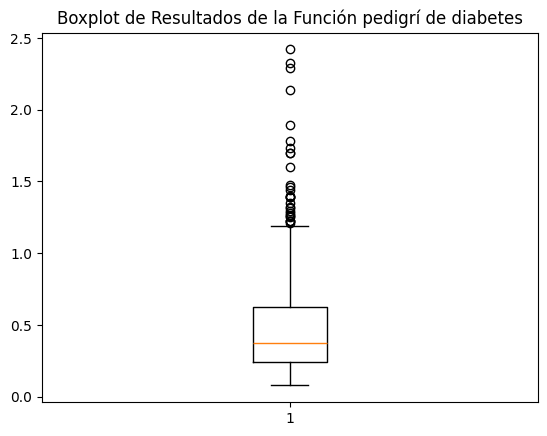

In [32]:
#Boxplot de DiabetesPedigreeFunction
plt.boxplot(df_misvars['DiabetesPedigreeFunction'])
plt.title('Boxplot de Resultados de la Función pedigrí de diabetes')

Podemos ver que la mayoría de los resultados de la Función de pedigrí de diabetes varían entre valores bajos menores a 1.2, aproximadamente. Los datos atípicos se enuentran por arriba de este rango y llegan hasta 2.4. No fue necesario corregir valores nulos ya que no había.

Text(0.5, 1.0, 'BMI de acuerdo a si son Diabéticos')

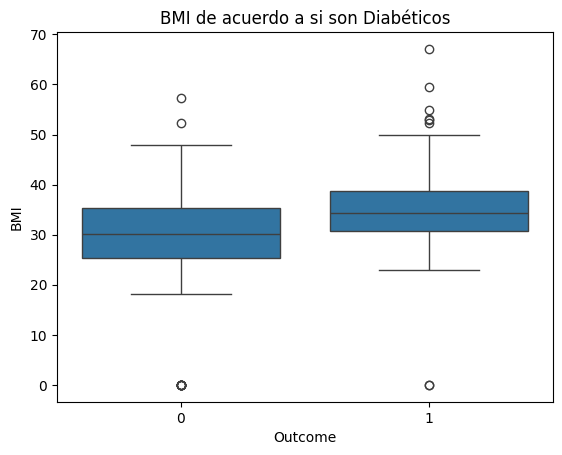

In [33]:
#BMI de acuerdo a diabéticos y no diabéticos (Comparación de Boxplots)
sns.boxplot(df_misvars, x="Outcome", y="BMI")
plt.title("BMI de acuerdo a si son Diabéticos")

Al comparar la distribución del BMI con boxplots entre personas con diabetes y personas sin diabetes, se puede notar que, para las personas con diabetes, los valores de su BMI suelen concentrarse más arriba que los de aquellas sin diabetes. El rango común de sus valores está más arriba, así como sus medianas y cada uno de sus cuartiles.

Text(0.5, 1.0, 'DiabetesPedigreeFunction de acuerdo a si son Diabéticos')

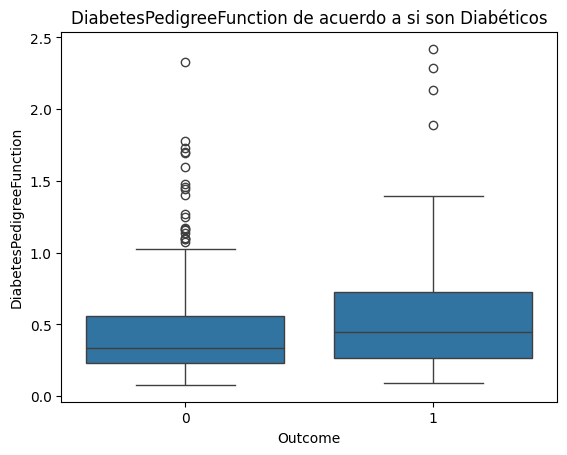

In [34]:
#DiabetesPedigreeFunction de acuerdo con diabéticos y no diabéticos (Comparación de Boxplots)
sns.boxplot(df_misvars, x="Outcome", y="DiabetesPedigreeFunction")
plt.title("DiabetesPedigreeFunction de acuerdo a si son Diabéticos")

Al comparar la distribución de los resultados de la Función de pedigrí de diabetes con boxplots entre personas con diabetes y personas sin diabetes, se puede notar que, para las personas con diabetes, sus resultados suelen concentrarse más arriba que los de aquellas sin diabetes. El límite inferior del rango común de sus valores está ligeramente más arriba y el límite superior llega mucho más alto. Asimismo, la mediana y cada uno de los cuartiales se encuentra más arriba para las personas con diabetes que para las personas sin diabetes. Sin embargo, es importante mencionar que hay muchos datos atípicos en el boxplot de las personas sin diabetes que llegan más alto.

In [35]:
#Matriz de correlación de todas las variables
variables_numericas = df.select_dtypes(include='number')
matriz_correlacion = variables_numericas.corr().round(2)
matriz_correlacion

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


Text(0.5, 1.0, 'Correlación entre las variables')

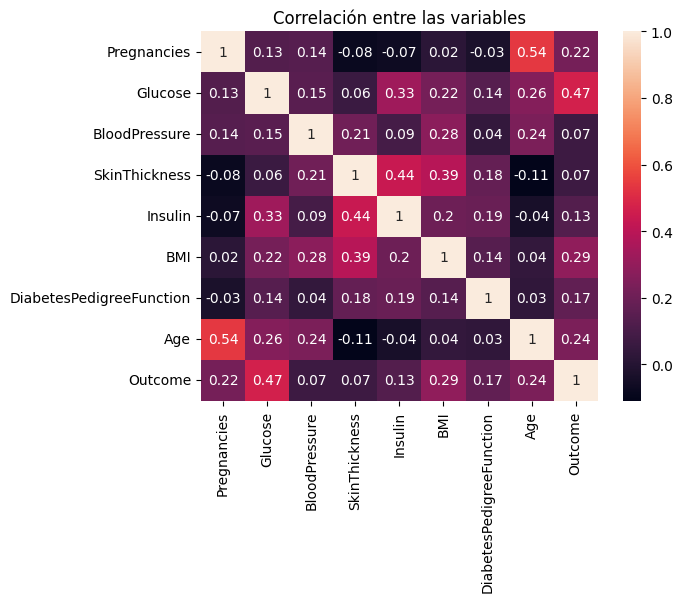

In [36]:
#Mapa de calor a partir de la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True)
plt.title('Correlación entre las variables')

Al observar la correlación entre las variables, enfocándonos en si la persona tiene diabetes o no, podemos ver que el nivel de concentración de la glucosa tiene la correlación más fuerte (0.47) de entre todas las demás variables, es positiva y es lo que más puede servir para predecir si alguna paciente tiene diabetes. A mayor glucosa, mayor la probabilidad de que tenga diabetes.

En cuanto a mis variables seleccionadas, la que mayor correlación tiene con el Outcome es el BMI con 0.29, ya que DiabetesPedigreeFunction solo tiene 0.17. Ambas tienen correlación positiva, lo que indica que a mayor sea el valor que se tiene, más probable es que la persona tenga diabetes; esto lo podemos comprobar con los boxplots realizados anteriormente de acuerdo a si las personas eran diabéticas o no. Asimismo, la correlación de ambas es débil ya que se encuentran entre 0.1 y 0.3.